In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import networkx as nx

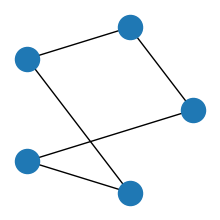

In [17]:
# Creación de grafo dirigido

G= nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E"])
G.add_edges_from([("A", "B"),
                 ("A", "D"),
                 ("B", "C"),
                 ("C", "E"),
                 ("D", "E")])
plt.figure(figsize=(2,2))
nx.draw_circular(G)

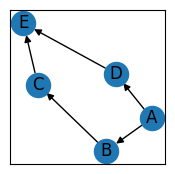

In [25]:
G= nx.DiGraph()  #Va hacia un grafo dirigido
G.add_nodes_from(["A", "B", "C", "D", "E"])
G.add_edges_from([("A", "B"),
                 ("A", "D"),
                 ("B", "C"),
                 ("C", "E"),
                 ("D", "E")])
plt.figure(figsize=(2,2))
nx.draw_networkx(G, arrows=True, arrowstyle= "-|>")

In [29]:
G.add_edges_from( [ ("A","B",{"weight": 2.1}),
                    ("A", "D",{"weight": 6.6}), 
                    ("B", "C", {"weight": 10.7}),
                    ("C", "E",{"weight": 1.1}),
                    ("D", "E",{"weight": 0.8}),
                    ("B", "A",{"weight": 8.6}),
                    ("D", "A",{"weight": 6.6}),
                    ("C", "B",{"weight": 7.3}),
                    ("E", "C",{"weight": 3.56}),
                    ("E", "D",{"weight": 4.2})] ) 
edgelist= nx.to_pandas_edgelist(G);
edgelist

,source,target,weight
0,A,B,2.10
1,A,D,6.60
2,B,C,10.70
3,B,A,8.60
4,C,E,1.10
5,C,B,7.30
6,D,E,0.80
7,D,A,6.60
8,E,C,3.56
9,E,D,4.20


In [30]:
list(G.adjacency())
adjacency= nx.to_pandas_adjacency(G)
adjacency

,A,B,C,D,E
A,0.0,2.1,0.00,6.6,0.0
B,8.6,0.0,10.70,0.0,0.0
C,0.0,7.3,0.00,0.0,1.1
D,6.6,0.0,0.00,0.0,0.8
E,0.0,0.0,3.56,4.2,0.0


In [40]:
columnas = ["A", "B", "C", "D", "E"]
data= np.zeros([5,5])
df= pd.DataFrame(data=data, columns=columnas, index=columnas)
df.loc["A","B"] = 2.1
df.loc["B","A"] = 8.6
df.loc["B","C"] = 10.2
df.loc["C","B"] = 7.3
df.loc["C","E"] = 1.1
df.loc["E","C"] = 3.56
df.loc["E","D"] = 0.8
df.loc["D","E"] = 4.2
df.loc["A","D"] = 7.5
df.loc["D","A"] = 6.6

df

,A,B,C,D,E
A,0.0,2.1,0.00,7.5,0.0
B,8.6,0.0,10.20,0.0,0.0
C,0.0,7.3,0.00,0.0,1.1
D,6.6,0.0,0.00,0.0,4.2
E,0.0,0.0,3.56,0.8,0.0


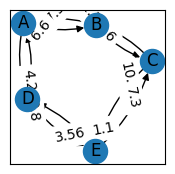

In [42]:
G= nx.from_pandas_adjacency(df, create_using=nx.DiGraph())
plt.figure(figsize=(2,2))
pos=nx.spring_layout(G) #Genera posiciones
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle= "-|>", connectionstyle="arc3, rad=0.15")
pesos= nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels (G, pos, pesos, label_pos=0.3);

# mapa de calor con los datos y sacar los cuartiles y mapa de calor con el umbral del 50%